In [1]:
from boxoffice.db.frames import get_movie_frame, get_box_office_day_frame
import numpy as np


frame = get_movie_frame()
bodf = get_box_office_day_frame()

if frame is None or bodf is None:
    print("Error getting data")
    exit(1)

sums = bodf.groupby("movie")["revenue"].sum()

frame["total_box_office"] = frame["id"].map(sums)

In [2]:
# print out the percentiles, every 5%
quantiles = frame['total_box_office'].quantile([i/20 for i in range(21)])

np.set_printoptions(suppress=True, precision=2)

print(quantiles)

# print the percent of the movies that made less than $1M
percent = 100 * len(frame[frame['total_box_office'] < 1_000_000]) / len(frame)
print(f'{percent:.2f}% of movies made less than $1M')

0.00            4.0
0.05          916.2
0.10         2795.4
0.15         7705.0
0.20        17045.8
0.25        37151.0
0.30        93518.8
0.35       216429.2
0.40       512450.0
0.45      1248117.4
0.50      2670925.0
0.55      5149754.8
0.60      9480311.6
0.65     15468533.0
0.70     22376780.0
0.75     32033283.0
0.80     43790549.0
0.85     59883878.4
0.90     88054917.8
0.95    151546947.8
1.00    992642689.0
Name: total_box_office, dtype: float64
43.72% of movies made less than $1M


<Axes: xlabel='days', ylabel='box_office'>

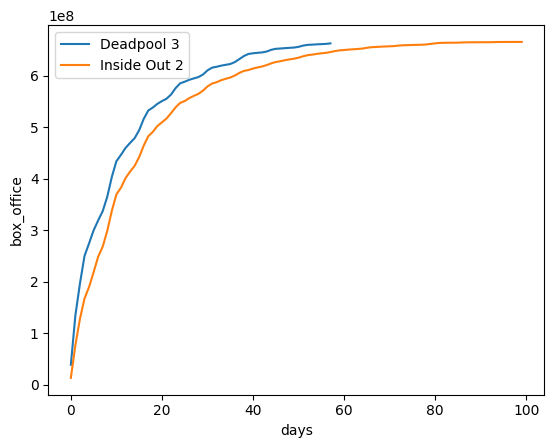

In [3]:
deadpool_id = 1
inside_out_id = 5

# filer the box office day frame to only include deadpool and inside out
deadpool = bodf[bodf['movie'] == deadpool_id]
inside_out = bodf[bodf['movie'] == inside_out_id]

# sort the data by day
deadpool = deadpool.sort_values('date')
inside_out = inside_out.sort_values('date')

# reset index
deadpool = deadpool.reset_index()
inside_out = inside_out.reset_index()

# calculate the cumulative box office
deadpool['box_office'] = deadpool['revenue'].cumsum()
inside_out['box_office'] = inside_out['revenue'].cumsum()

# double cumulative line plots, same y axis
import seaborn as sns

# x axis as number of days since release
deadpool['days'] = deadpool.index
inside_out['days'] = inside_out.index

sns.lineplot(x='days', y='box_office', data=deadpool, label='Deadpool 3')
sns.lineplot(x='days', y='box_office', data=inside_out, label='Inside Out 2')
